In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from pylab import rcParams

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('data/air_pollution.csv', parse_dates=['date'])
df.set_index('date', inplace=True)
df.head()

,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
date,,,,,,,,
2010-01-02,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0,10.041667
2010-01-03,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0,145.958333
2010-01-04,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0,78.833333
2010-01-05,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0,31.333333
2010-01-06,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0.000000,0.0,42.458333


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2010-01-02 to 2014-12-31
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pollution_today      1825 non-null   float64
 1   dew                  1825 non-null   float64
 2   temp                 1825 non-null   float64
 3   press                1825 non-null   float64
 4   wnd_spd              1825 non-null   float64
 5   snow                 1825 non-null   float64
 6   rain                 1825 non-null   float64
 7   pollution_yesterday  1825 non-null   float64
dtypes: float64(8)
memory usage: 128.3 KB


In [4]:
df.describe()

,pollution_today,dew,temp,press,wnd_spd,snow,rain,pollution_yesterday
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,98.245080,1.828516,12.459041,1016.447306,23.894307,0.052763,0.195023,98.245080
std,76.807697,14.163508,11.552997,10.076053,41.373161,0.546072,0.993917,76.807697
min,3.166667,-33.333333,-14.458333,994.041667,1.412500,0.000000,0.000000,3.166667
25%,42.333333,-10.083333,1.541667,1007.916667,5.904167,0.000000,0.000000,42.333333
50%,79.166667,2.041667,13.916667,1016.208333,10.953750,0.000000,0.000000,79.166667
75%,131.166667,15.083333,23.166667,1024.541667,22.235000,0.000000,0.000000,131.166667
max,541.895833,26.208333,32.875000,1043.458333,463.187917,14.166667,17.583333,541.895833


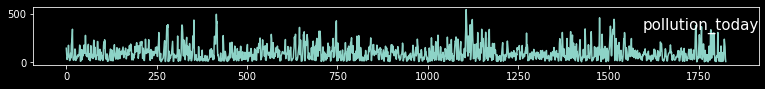

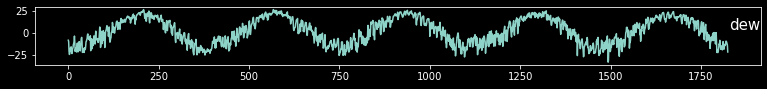

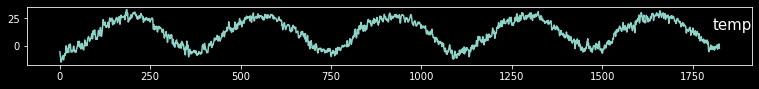

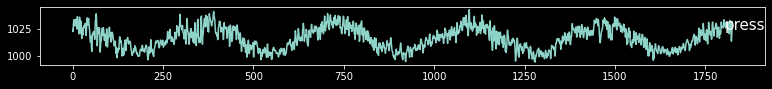

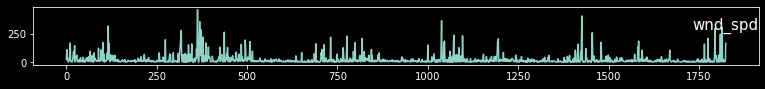

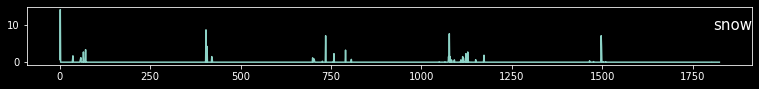

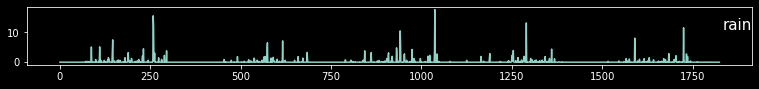

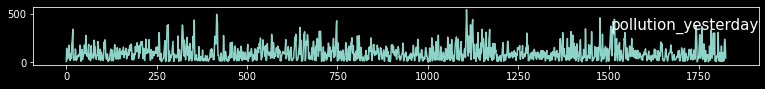

In [5]:
values = df.values
groups = [0,1,2,3,4,5,6,7]
i = 1

for group in groups:
    plt.figure(figsize=(13,10))
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.5, loc='right', fontsize=15)
    i+=1

plt.show()

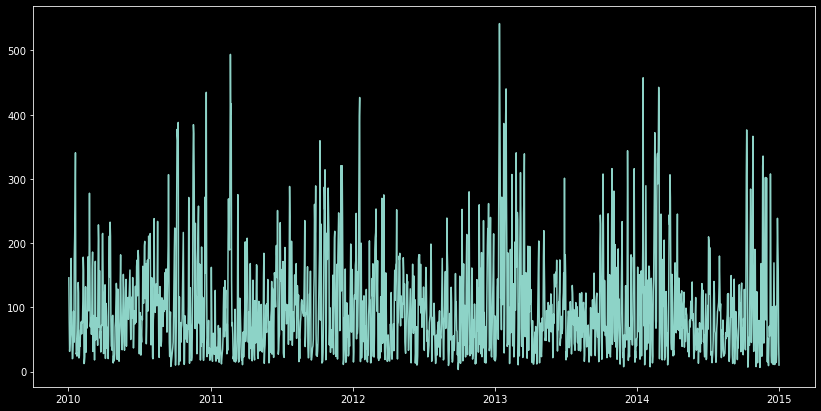

In [6]:
plt.figure(figsize=(14,7))
plt.plot(df.pollution_today)
plt.show()

### Seasonal Decomposition

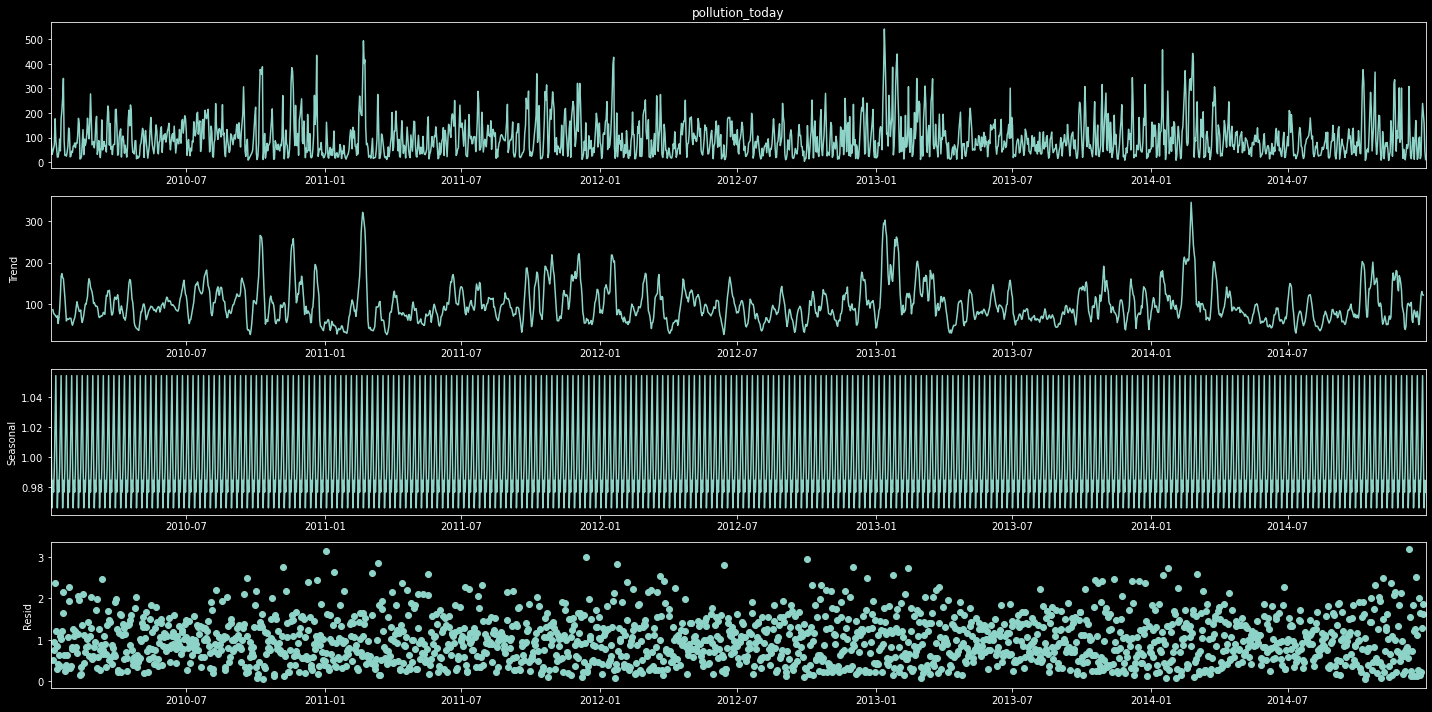

In [7]:
rcParams['figure.figsize'] = 20,10
decomposition = seasonal_decompose(df.pollution_today, model='multiplicative')
decomposition.plot()
plt.show()

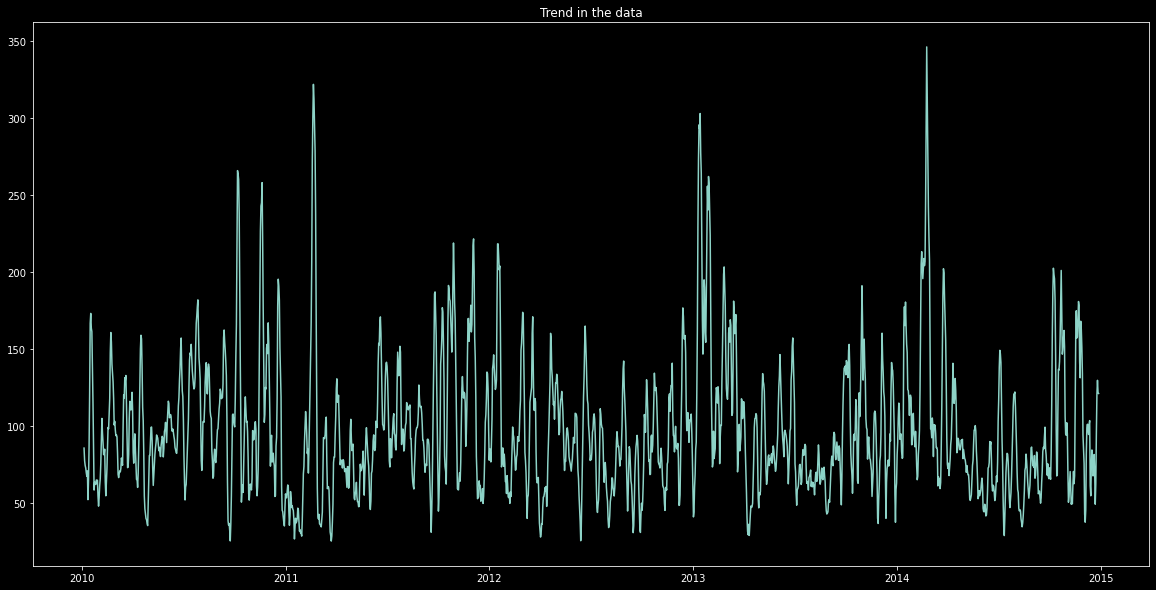

In [8]:
# observing trend
plt.plot(decomposition.trend)
plt.title('Trend in the data')
plt.show()

#### Observations:
- No strong trend is present in the data

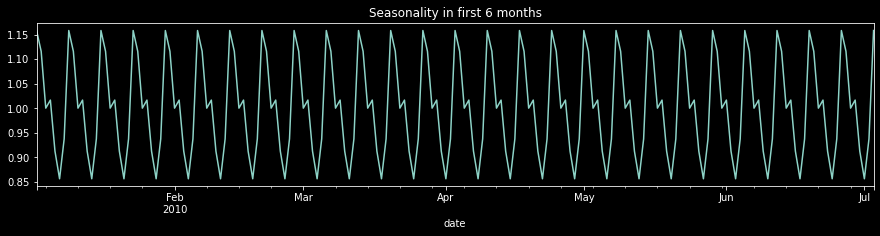

In [9]:
# observing seasonality
# trend in first 6 months
plt.figure(figsize=(15,3))
decomposition = seasonal_decompose(df.pollution_today[:183], model='multiplicative')
decomposition.seasonal.plot()
plt.title('Seasonality in first 6 months')
plt.show()

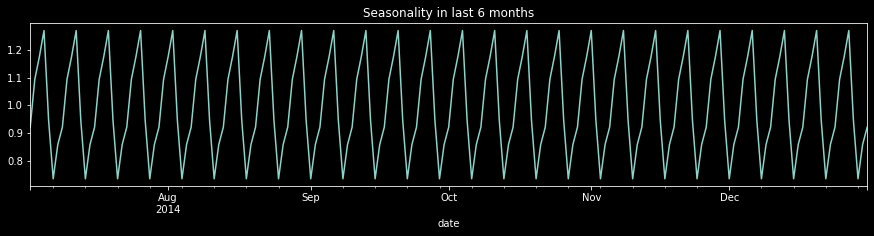

In [10]:
# observing seasonality
# trend in last 6 months
plt.figure(figsize=(15,3))
decomposition = seasonal_decompose(df.pollution_today[-183:], model='multiplicative')
decomposition.seasonal.plot()
plt.title('Seasonality in last 6 months')
plt.show()

#### Observations:
- strong weakly seasonality is present in the data
- but the seasonality pattern varies along the data with time

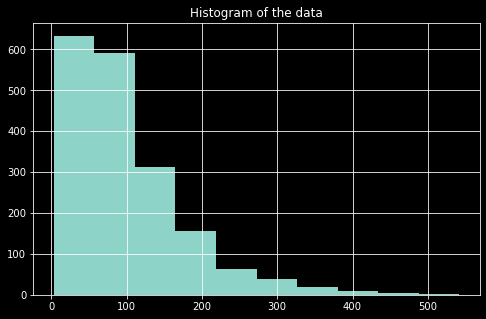

In [11]:
# checking if the data is white noise?
plt.figure(figsize=(8,5))
df.pollution_today.hist()
plt.title('Histogram of the data')
plt.show()

<Figure size 360x360 with 0 Axes>

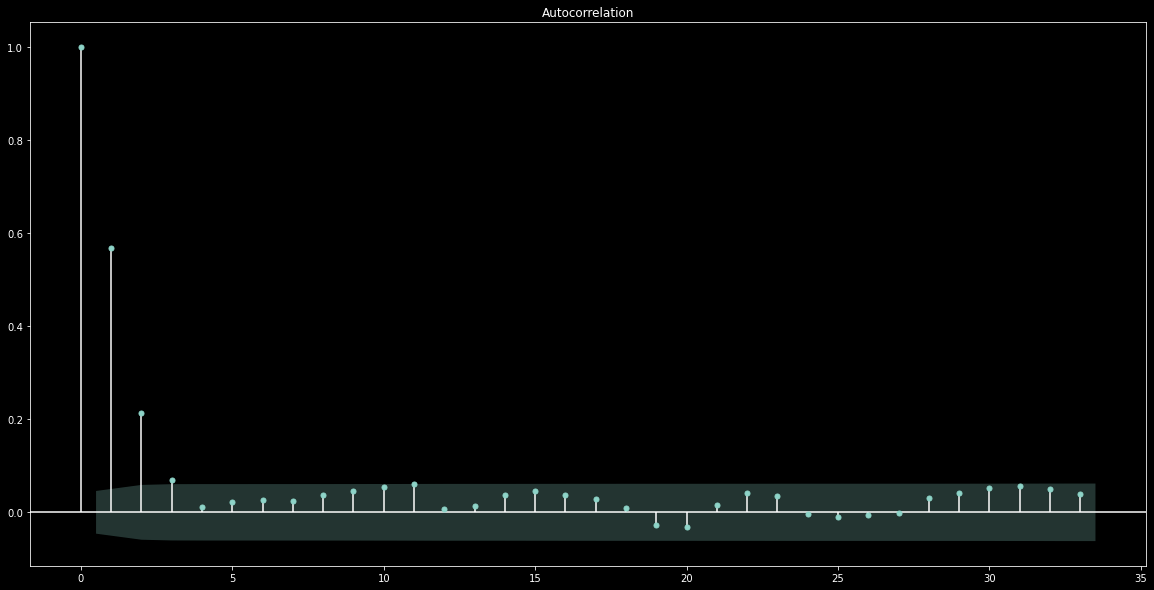

In [12]:
plt.figure(figsize=(5,5))
plot_acf(df.pollution_today)
plt.show()

#### Observations:
- The distribution is not Gaussian - so not a zero mean and not a constand std
- There exists correlation with closest values but very less correlation with distant values
- Data is not a white noise but there exist a very small part of white noise

#### Checking for stationarity

In [13]:
# check constant mean and variance
X = df.pollution_today.values
split = int(len(X)/2)
X1, X2 = X[:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2  = X1.var(), X2.var()
print('mean1: %f, mean2: %f' %(mean1, mean2))
print('var1: %f, var2: %f' %(var1, var2))

mean1: 99.638957, mean2: 96.852729
var1: 5621.229279, var2: 6166.969641


- mean and variance are almost same!

In [14]:
# augmented Dickey-fuller test
X = df.pollution_today.values
result = adfuller(X)
print('ADF statistic: {}'.format(result[0]))
print('p-value: %f' %result[1])
print('Critical values: ')
for key, value in result[4].items():
    print('\t%s: %.3f' %(key, value))

ADF statistic: -10.11671904937831
p-value: 0.000000
Critical values: 
	1%: -3.434
	5%: -2.863
	10%: -2.568


#### Observations:
- The data is stationary!